In [1]:
# Dependencies
import tweepy   # twitter api
import csv
import pandas as pd                          # data analysis (dataframes, read file)
import numpy as np                           # arrays and linear algebra
from IPython.display import display          # print output in tabular format
import matplotlib.pyplot as plt              # for 2D plotting
import nltk

In [2]:
#Read csv file into dataframe

bitcoin = pd.read_csv('bitcoin.csv', names = ["Tweets","Date","Likes","Retweets","Hashtag"])

print (bitcoin.head(10))

                                              Tweets                 Date  \
0  b'RT @IGToken_net: \xf0\x9f\x94\xa5\xf0\x9f\x9...  2018-06-22 08:36:01   
1  b'RT @KingCrypto_: How To Get Into Cryptocurre...  2018-06-22 08:36:00   
2  b"RT @KamikazePump: At 250 members I'll collec...  2018-06-22 08:35:59   
3  b'RT @BTC_Supreme: Thank you to the @coingecko...  2018-06-22 08:35:56   
4  b'#IXTUS, #Blockchain, #Bitcoin, #BTC, #Ethere...  2018-06-22 08:35:56   
5                            b'bounce soon #bitcoin'  2018-06-22 08:35:55   
6  b'RT @murthaburke: Luckchemy ICO- Provably Fai...  2018-06-22 08:35:51   
7  b"RT @SmartContracter: #FF\n\nThis week im onl...  2018-06-22 08:35:50   
8  b'RT @bloggers_view: ABC of Google Analytics  ...  2018-06-22 08:35:49   
9  b"RT @Fisher85M: Why can't you cheat #bitcoin,...  2018-06-22 08:35:44   

   Likes  Retweets   Hashtag  
0      0      1263  #bitcoin  
1      0         3  #bitcoin  
2      0        23  #bitcoin  
3      0         5  #bitcoin

In [3]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #We're returning the tweet which is cleaned(after replacin' the above pattern to null which means deleting)


def get_polarity(tweet):                         # here we're getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [4]:
bitcoin['Sentiment'] = np.array([ get_polarity(tweet) for tweet in bitcoin['Tweets'] ])

In [5]:
## Print top 10 tweets and notice Sentiment field added at the end of each record
print(bitcoin.head(10))

                                              Tweets                 Date  \
0  b'RT @IGToken_net: \xf0\x9f\x94\xa5\xf0\x9f\x9...  2018-06-22 08:36:01   
1  b'RT @KingCrypto_: How To Get Into Cryptocurre...  2018-06-22 08:36:00   
2  b"RT @KamikazePump: At 250 members I'll collec...  2018-06-22 08:35:59   
3  b'RT @BTC_Supreme: Thank you to the @coingecko...  2018-06-22 08:35:56   
4  b'#IXTUS, #Blockchain, #Bitcoin, #BTC, #Ethere...  2018-06-22 08:35:56   
5                            b'bounce soon #bitcoin'  2018-06-22 08:35:55   
6  b'RT @murthaburke: Luckchemy ICO- Provably Fai...  2018-06-22 08:35:51   
7  b"RT @SmartContracter: #FF\n\nThis week im onl...  2018-06-22 08:35:50   
8  b'RT @bloggers_view: ABC of Google Analytics  ...  2018-06-22 08:35:49   
9  b"RT @Fisher85M: Why can't you cheat #bitcoin,...  2018-06-22 08:35:44   

   Likes  Retweets   Hashtag  Sentiment  
0      0      1263  #bitcoin          0  
1      0         3  #bitcoin          0  
2      0        23  #bitco

In [6]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(bitcoin['Tweets']) if bitcoin['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(bitcoin['Tweets']) if bitcoin['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(bitcoin['Tweets']) if bitcoin['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(bitcoin['Tweets']) if bitcoin['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(bitcoin['Tweets']) if bitcoin['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(bitcoin['Tweets']) if bitcoin['Sentiment'][index] < 0] 

In [7]:
positive_data

,0
0,"b""RT @KamikazePump: At 250 members I'll collec..."
1,"b'#IXTUS, #Blockchain, #Bitcoin, #BTC, #Ethere..."
2,b'RT @murthaburke: Luckchemy ICO- Provably Fai...
3,b'good @pearl_pay #PRLPAY #Bitcoin #BTC #Komod...
4,b'RT @UnicornCoin_xyz: BIG NEWS! #UnicornCoin ...
5,b'#skyfchain #ICO #Crowdsale #Bitcoin #Blockch...
6,b'@availcrypto thanks you for following me! #c...
7,b'RT @_CryptoDude_: #Ardor and #Dominium about...
8,b'RT @x_ethereum: I will choose 20 random foll...
9,b'RT @qurrex: KEEP CALM &amp; GET YOUR $QRX TO...


In [8]:
## Print the positive tweets

print(positive_tweets[:10])

['b"RT @KamikazePump: At 250 members I\'ll collect 10 random people to win 1.000.000 SHND.\\n\\nHow to win ?\\n\\n1.Follow\\n2.Join https://t.co/6m0HdIV2q\\xe2\\x80\\xa6"', "b'#IXTUS, #Blockchain, #Bitcoin, #BTC, #Ethereum, #ETH, #ICO, #bounty\\n hope this project will succes and have a good\\xe2\\x80\\xa6 https://t.co/zu3AVyZ9ZD'", "b'RT @murthaburke: Luckchemy ICO- Provably Fair Online Gambling Platform! %40 Off Right NOW!\\nhttps://t.co/WHqyqDVxMk\\n@BIGMONEYMIKE6 @iamjamie\\xe2\\x80\\xa6'", "b'good @pearl_pay #PRLPAY #Bitcoin #BTC #Komodo #KMD\\nForm Link: https://t.co/4i45DXhd5M https://t.co/7rjtWqYdYa'", "b'RT @UnicornCoin_xyz: BIG NEWS! #UnicornCoin enters discussions with #Disney for an #exclusive collaboration! To win 1000 UCC worth 2 ETH:\\n1\\xe2\\x80\\xa6'", "b'#skyfchain #ICO #Crowdsale #Bitcoin #Blockchain #Token #ETH #Ethereum #TokenSale\\nSKYFchain is the first blockchain\\xe2\\x80\\xa6 https://t.co/LoAkNN7Hqu'", "b'@availcrypto thanks you for following me! #crypto #bit

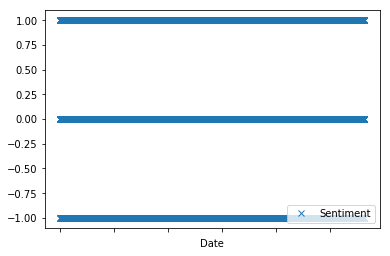

In [9]:
## Plotting sentiment points 

bitcoin.plot(x='Date',y='Sentiment',style='x')
plt.show()

In [10]:
sentiment_count = bitcoin['Sentiment'].value_counts()
sentiment_count

 1    14421
 0    11284
-1     2482
Name: Sentiment, dtype: int64

In [31]:
max_retweet = bitcoin[bitcoin['Retweets']==bitcoin['Retweets'].max()]
max_retweet

,Tweets,Date,Likes,Retweets,Hashtag,Sentiment
6517,"b'RT @btc: Bitcoin Giveaway #2: As promised, w...",2018-06-22 03:37:54,0,15669,#bitcoin,0


In [11]:
bitcoin['Hashtag'].value_counts()

#btc        16321
#bitcoin    11866
Name: Hashtag, dtype: int64

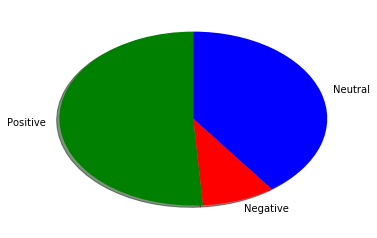

In [12]:
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
colors = ['green', 'red', 'blue']
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

In [15]:
# Let us test whether sentiment analysis is done correctly. Print sixth tweet.

bitcoin["Tweets"][6]

"b'RT @murthaburke: Luckchemy ICO- Provably Fair Online Gambling Platform! %40 Off Right NOW!\\nhttps://t.co/WHqyqDVxMk\\n@BIGMONEYMIKE6 @iamjamie\\xe2\\x80\\xa6'"

In [16]:
bitcoin["Sentiment"][6]

1

In [19]:
positive_data.columns = ['Text']

In [20]:
import string
from collections import Counter
from nltk.tokenize import TweetTokenizer #specially to handle tweets into documents
from nltk.corpus import stopwords # to remove stop words like is, was etc...
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    #text = text.lower() # for normalization
    text = ' '.join(text).lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if not tok in stopwords and not tok.isdigit()]

#fname = "C:\\Users\\saraf\\Desktop\\CBA\\Term 1\\Practicum\\IPL\\output1.jsonl"
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['rt','via', '...']
tf = Counter()
tokens = process(text=positive_data['Text'],tokenizer=tweet_tokenizer,stopwords=stopword_list)
tf.update(tokens)
for tag, count in tf.most_common(50):
        print("{}: {}".format(tag, count))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saraf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
xe2: 15163
n: 14484
x80: 14286
xa6: 12994
b'rt: 10665
new: 3915
btc: 3756
ndetails: 3559
total: 3297
launching: 3285
listing: 3271
rewards: 3269
together: 3261
promotion: 3259
@kucoincom: 3250
1,000: 3191
aoa: 2510
@auroraoffic_en: 2509
av: 2507
#bitcoin: 2389
xf0: 2227
x9f: 2226
eth: 2009
b: 1893
:\: 1323
n1: 1234
#btc: 1160
#airdrop: 1158
win: 1116
#crypto: 1107
like: 1064
airdrop: 1037
follow: 1004
#blockchain: 1003
get: 965
retweet: 949
n2: 938
#bounty: 933
x83: 870
xe3: 859
n3: 844
@qurrex: 802
coins: 800
:/: 768
followers: 758
comment: 758
tokens: 749
address: 733
platform: 728
participate: 721


In [21]:
from nltk.tokenize import wordpunct_tokenize
from subprocess import check_output

def process(text, tokenizer=TweetTokenizer(), stopwords=[]):
    #text = text.lower() # for normalization
    text = ' '.join(text).lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if not tok in stopwords and not tok.isdigit()]

#fname = "C:\\Users\\saraf\\Desktop\\CBA\\Term 1\\Practicum\\IPL\\output1.jsonl"
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopword_list = stopwords.words('english') + punct + ['b','n','co','versaratrade','rt','via', '...','b\'rt','https','#versaratrade','@versaratrade','@', '#', 'amp', 'http', '/', '://', '_',]
series_tweets = positive_data['Text']
tweet_str = series_tweets.str.cat(sep = ' ')
list_of_words = [i.lower() for i in wordpunct_tokenize(tweet_str) if i.lower() not in stopword_list and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)


[('btc', 4967), ('new', 4162), ('ndetails', 3559), ('total', 3298), ('launching', 3285), ('listing', 3271), ('rewards', 3269), ('together', 3261), ('promotion', 3260), ('kucoincom', 3250), ('bitcoin', 2915), ('aoa', 2511), ('av', 2507), ('eth', 2266), ('airdrop', 2213), ('crypto', 1509), ('blockchain', 1369), ('qurrex', 1328), ('win', 1125), ('follow', 1100), ('like', 1078), ('ico', 1068), ('retweet', 1048), ('get', 1018), ('bounty', 1016), ('cryptocurrency', 838), ('coins', 819), ('tokens', 782), ('followers', 759), ('comment', 758), ('platform', 733), ('address', 733), ('participate', 724), ('nhttps', 722), ('first', 719), ('worth', 713), ('prlpay', 688), ('rewarding', 674), ('pearlpay', 670), ('airdropalert', 667), ('pr', 663), ('random', 660), ('choose', 619), ('still', 614), ('xef', 605), ('free', 601), ('cbc', 597), ('join', 596), ('cashbetcoin', 596), ('availabl', 594)]


In [22]:
mostcom = str(mostcommon)

In [23]:
data_new = pd.DataFrame(mostcommon, columns = ['word','frequency'])
data_new.head(10)

,word,frequency
0,btc,4967
1,new,4162
2,ndetails,3559
3,total,3298
4,launching,3285
5,listing,3271
6,rewards,3269
7,together,3261
8,promotion,3260
9,kucoincom,3250


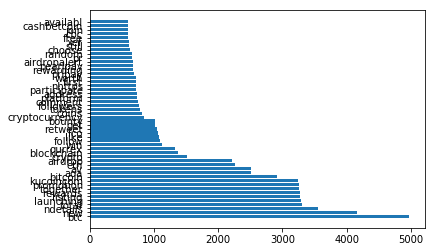

In [24]:
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()

(-0.5, 399.5, 199.5, -0.5)

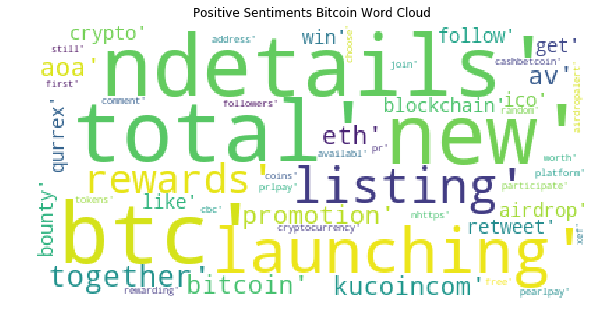

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=60
                      , background_color="white"
                      , stopwords=stopword_list
                      , collocations=False).generate(mostcom)

# Display the generated image with matplotlib 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title('Positive Sentiments Bitcoin Word Cloud')
plt.savefig("wordcloud_bitcoin.png")
plt.axis("off")